In [ ]:
import os

import pandas as pd
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import raw_text_processing.pattern_classifiers as pat_cls

In [2]:
def make_words_cloud(text: str) -> WordCloud:
    return WordCloud(
        width=800,
        height=800,
        max_words=400,
        prefer_horizontal=1,
    ).generate(text)


def plot_words_cloud(
    wordcloud: WordCloud,
    figsize: tuple[int, int] = (10, 8),
):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    plt.show();

# 1. Source Data

## 1.1. Upload

In [3]:
DATA_ROOT_P = 'data_temp/2025-06-25_source_data'

DATA_6MONTHS_P = os.path.join(DATA_ROOT_P, 'Пример_выгрузки_6_мес_2024.csv')

In [6]:
df_6_months = pd.read_csv(DATA_6MONTHS_P)
df_6_months.shape

(87963, 30)

## 1.2. Prepare Data

Подготовка данных:

1. Берем закрытые обращения
2. Берем обращения с указанными темой и тематикой
3. Берем обращения с текстом

In [7]:
print(f'requests total: {df_6_months.shape[0]}')

mask_closed = df_6_months['Статус обработки обращений'] == 'Закрытое'
print(f'closed requests: {mask_closed.sum()}')

closed_topic_none_mask = (
    df_6_months[mask_closed]['Общая тема'].isna()
    * df_6_months[mask_closed]['Тематика'].isna()
)
print(f'closed request without topic: {closed_topic_none_mask.sum()}')
print(f'closed request with topic: {(~closed_topic_none_mask).sum()}')


print('\n', 'Let "existing_data" be closed requests with topic.', '\n')

topic_exist_data = df_6_months[mask_closed][~closed_topic_none_mask]
print(f'existing data: {topic_exist_data.shape}')

mask_existing_without_text = topic_exist_data['Суть обращения'].isna()
print(f'existing data without text: {mask_existing_without_text.sum()}')
print(f'existing data with text: {(~mask_existing_without_text).sum()}')


print('\n', 'Let "defined_data" be exist_data with text.', '\n')

defined_data = topic_exist_data[~mask_existing_without_text]
print(f'defined_data: {defined_data.shape}')

requests total: 87963
closed requests: 86322
closed request without topic: 10
closed request with topic: 86312

 Let "existing_data" be closed requests with topic. 

existing data: (86312, 30)
existing data without text: 49
existing data with text: 86263

 Let "defined_data" be exist_data with text. 

defined_data: (86263, 30)


Распределение запросов по типам:

In [8]:
(
    defined_data[['Тип']]
    .groupby(by=['Тип']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Тип,Count
4,Консультация,36636
3,Заявка,29985
1,Дополнение к тикету,18343
2,Жалоба,967
5,Пожелание,201
0,Благодарность,123


Распределение запросов по темам и тематикам:

In [9]:
(
    defined_data[['Общая тема']]
    .groupby(by=['Общая тема']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Общая тема,Count
6,Программа лояльности,39042
3,Мобильное приложение,28012
2,Качество обслуживания,3930
0,Акции,3576
5,Онлайн Оплата,3416
4,Нецелевой звонок,3127
9,ЧаВо,1820
1,Использование ААЗС,1510
8,Топливо,1405
7,СТиУ,425


In [10]:
(
    defined_data[['Общая тема', 'Тематика']]
    .groupby(by=['Общая тема', 'Тематика']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Общая тема,Тематика,Count
48,Мобильное приложение,Удаление аккаунта,23815
90,Программа лояльности,Не начислены бонусы ВКЛ (NFC и QR),13770
82,Программа лояльности,Доначисление бонусов (пластик),10389
97,Программа лояльности,Управление бонусной картой,5906
99,Программа лояльности,Условия ПЛ,2425
60,Нецелевой звонок,Пустой e-mail,1953
67,Онлайн Оплата,Не смог заправиться через МП,1860
49,Мобильное приложение,Функционал в МП,1520
91,Программа лояльности,Объединение карт,1430
80,Программа лояльности,Виртуальная карта лояльности,1390


In [11]:
# .to_csv('./data_stats/33_sub_topics.csv')

Облако слов:

Words total: 4707542
Unique words: 295151


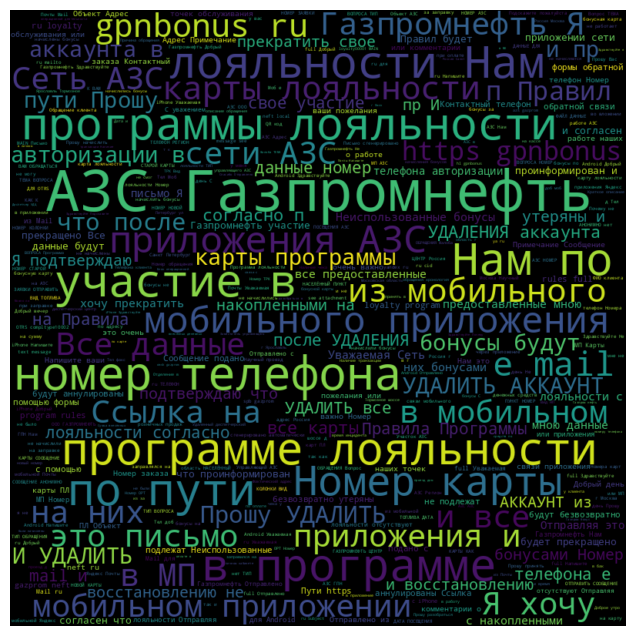

In [12]:
defined_data_clear_words = ' '.join(
    [str(msg) for msg in defined_data['Суть обращения']]
)
print(f"Words total: {len(defined_data_clear_words.split(' '))}")
print(f"Unique words: {len(set(defined_data_clear_words.split(' ')))}")

plot_words_cloud(make_words_cloud(defined_data_clear_words))

# 2. Classify Patterns

## 2.1. Classification

Паттерны - часто встречающиеся одинаковые структуры обращений, из которых достаточно просто (алгоритмически через регулярные варажения) выделять целевые поля - как текст обращения, так и остальные: номер карты ПЛ, телефон и пр.

Паттерны:

|№|Паттерн|Описание|
|:-|:-|:-|
|0|NoText|Отсутствие текста в обращении, указание на прикрепленный файл.|
|1|OTRS|Письмо, сгенерированное автоматически системой OTRS.|
|2|AccRemoval|Запрос на удаление аккаунта.|
|3|Standard|Популярная форма с полями (Контактный телефон, Номер карты ПЛ, Объект, Адрес, Примечание).|
|4|UDC|Структурированная форма из источника (поле "Способ поступления") УДЦ.|
|5|HotlineEmpty|Автоматически сгенерированное сообщение из источника (поле "Способ поступления") hot-line@gazprom-neft.biz с текстом "The letter was sent automatically, please do not reply to this message".|
|6|HotlineHotline|Сообщение из источника (поле "Способ поступления") hot-line@gazprom-neft.biz с темой "Сообщение из формы HOTLINE".|
|7|HotlineFree|Сообщение из источника (поле "Способ поступления") hot-line@gazprom-neft.biz в свободной форме.|
|8|HotlineFeedback|Сообщение из источника (поле "Способ поступления") hot-line@gazprom-neft.biz через web-форму обратной связи.|
|9|CorpRes|Сообщение из источника (поле "Способ поступления") Внутрикорпоративные ресурсы.|
|10|Other|Неструктурированные обращения. Выходящие за рамки ранее описанных.|


Классификация имеющихся данных:

In [13]:
defined_data.shape

(86263, 30)

In [14]:
print('Pattern Classifiers:')
pat_cls.IDX_TO_PATTERN

Pattern Classifiers:


{0: 'NoText',
 1: 'OTRS',
 2: 'AccRemoval',
 3: 'Standard',
 4: 'UDC',
 5: 'HotlineEmpty',
 6: 'HotlineHotline',
 7: 'HotlineFree',
 8: 'HotlineFeedback',
 9: 'CorpRes',
 10: 'ComplaintBook',
 11: 'Other'}

In [19]:
df_cls = pat_cls.classify_patterns(defined_data, text_col="Суть обращения")
print(f"df_cls: {df_cls.shape}")

df_cls_report = pat_cls.make_classification_report(df_cls)
df_cls_report

df_cls: (86263, 2)


,Pattern_Idx,Pattern_Name,Count
0,0,NoText,2336
1,1,OTRS,1666
2,2,AccRemoval,23580
3,3,Standard,20427
4,4,UDC,712
5,5,HotlineEmpty,25
6,6,HotlineHotline,53
7,7,HotlineFree,47
8,8,HotlineFeedback,231
9,9,CorpRes,93


In [20]:
_other_cnt = df_cls_report[df_cls_report['Pattern_Name'] == 'Other']['Count'].item()
_total_cnt = df_cls_report[df_cls_report['Pattern_Name'] == 'Total']['Count'].item()

_other_frac = round(_other_cnt / _total_cnt, 3)
print('Other / Total')
print(f'{_other_cnt} / {_total_cnt}')
print(f'fraction: {_other_frac}')

Other / Total
36925 / 86263
fraction: 0.428


Распределение неструктурированных запросов по типам:

In [21]:
undefined_pattern_mask = df_cls['Pattern_Name'] == 'Other'

In [22]:
(
    defined_data[undefined_pattern_mask][['Тип']]
    .groupby(by=['Тип']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Тип,Count
3,Заявка,18338
1,Дополнение к тикету,11795
4,Консультация,6117
2,Жалоба,475
5,Пожелание,112
0,Благодарность,82


Распределение неструктурированных запросов по темам и тематикам:

In [23]:
(
    defined_data[undefined_pattern_mask][['Общая тема']]
    .groupby(by=['Общая тема']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Общая тема,Count
6,Программа лояльности,25054
2,Качество обслуживания,2147
3,Мобильное приложение,2114
4,Нецелевой звонок,1942
0,Акции,1589
5,Онлайн Оплата,1560
9,ЧаВо,1093
8,Топливо,707
1,Использование ААЗС,498
7,СТиУ,221


In [24]:
(
    defined_data[undefined_pattern_mask][['Общая тема', 'Тематика']]
    .groupby(by=['Общая тема', 'Тематика']).size()
    .reset_index(name='Count')
    .sort_values(by=['Count'], ascending=False)
)

,Общая тема,Тематика,Count
88,Программа лояльности,Не начислены бонусы ВКЛ (NFC и QR),8689
80,Программа лояльности,Доначисление бонусов (пластик),7316
95,Программа лояльности,Управление бонусной картой,4270
89,Программа лояльности,Объединение карт,1068
59,Нецелевой звонок,Пустой e-mail,1066
97,Программа лояльности,Условия ПЛ,1061
66,Онлайн Оплата,Не смог заправиться через МП,825
124,ЧаВо,Содержание чека/дубликат чека,818
26,Качество обслуживания,Безналичный расчет,687
49,Мобильное приложение,Функционал в МП,661


In [25]:
# .to_csv('./data_stats/33_sub_topics.csv')

Облако слов по неструктурированным обращениям:

Words total: 1000050
Unique words: 142195


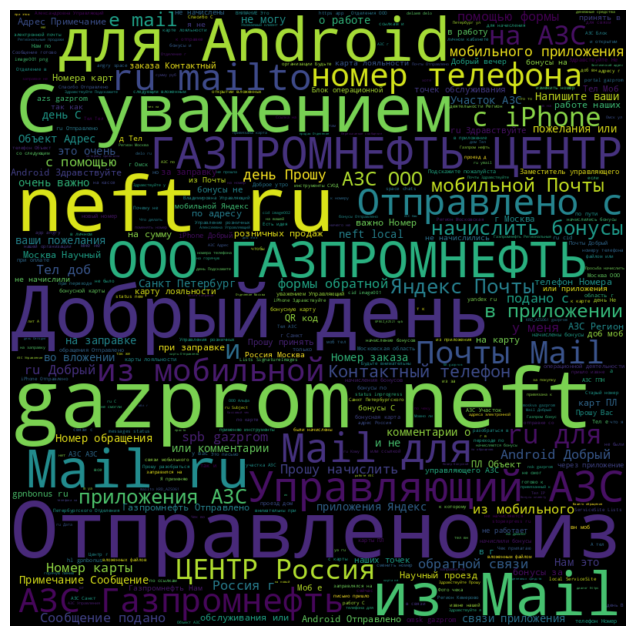

In [26]:
defined_data_clear_words = ' '.join(
    [str(msg) for msg in defined_data[undefined_pattern_mask]['Суть обращения']]
)
print(f"Words total: {len(defined_data_clear_words.split(' '))}")
print(f"Unique words: {len(set(defined_data_clear_words.split(' ')))}")

plot_words_cloud(make_words_cloud(defined_data_clear_words))

## 2.3. Messages Content

In [27]:
print('Pattern Classifiers:')
pat_cls.IDX_TO_PATTERN

Pattern Classifiers:


{0: 'NoText',
 1: 'OTRS',
 2: 'AccRemoval',
 3: 'Standard',
 4: 'UDC',
 5: 'HotlineEmpty',
 6: 'HotlineHotline',
 7: 'HotlineFree',
 8: 'HotlineFeedback',
 9: 'CorpRes',
 10: 'ComplaintBook',
 11: 'Other'}

In [28]:
_step = 31
_step * 1

31

In [30]:
_bin = 0
_step = 2
_cols_to_take = [
    'Суть обращения',
    'Общая тема', 'Тематика', 'Тип',
    '№ АЗС', '№ ТРК', 'Вид НП',
    '№ бонусной карты', 'Карта № 1', 'Карта № 2',
]

undefined_pattern_mask = df_cls['Pattern_Name'] == 'ComplaintBook'
source_mask = defined_data[undefined_pattern_mask]['Способ поступления'] == 'E-mail'
print(f'source_mask true amount: {source_mask.sum()}, \n')

for idx, msg in enumerate(
    defined_data[undefined_pattern_mask][source_mask][_cols_to_take]
    .values[_bin*_step : (_bin+1)*_step]
):
    print(f'({idx + _bin*_step})', '==='*20)
    print(f'Общая тема: {msg[1]}, \nТематика: {msg[2]}, \nТип: {msg[3]} \n{"---"*10}')
    print(f'№ АЗС: {msg[4]}, \n№ ТРК: {msg[5]}, \nВид НП: {msg[6]} \n{"---"*10}')
    print(f'№ бонусной карты: {msg[7]}, \nКарта № 1: {msg[8]}, \nКарта № 2: {msg[9]}')

    print('==='*20)
    print(msg[0], '\n', '\n')

source_mask true amount: 2, 

(0) ============================================================
Общая тема: Качество обслуживания, 
Тематика: Техническая неисправность оборудования, 
Тип: Дополнение к тикету 
------------------------------
№ АЗС: 142, 
№ ТРК: nan, 
Вид НП: nan 
------------------------------
№ бонусной карты: nan, 
Карта № 1: nan, 
Карта № 2: nan
Добрый день.

№ Магазина и АЗС

255/142

Дата обращения Клиента

26.11.2024

№ страницы, на которой оставлена запись Клиента

5

ФИО клиента

Двинянин И. А.

E-mail

-

Адрес

СПБ, ул. Зайцева 18/16 кв44

Телефон

89995248252

Тема

Работа ТРК

Тематика

Обнуление табло ТРК

Тип обращения (Жалоба/Вопрос/Мнение)

Жалоба

Суть обращения

Некорректная работа ТРК

Принятые меры

Проведена проверка ТРК, подана заявка SD-27110315

Ответ клиенту

Уважаемый клиент!
На АЗС «Газпромнефть», в рамках проведения технического обслуживания, ежемесячно, проводится проверка ТРК.
Ежемесячно проводятся прокачка всех ТРК на погрешность.
По Вашей п

## 2.4. Messages Sources

In [31]:
patterns_source_summary = pd.DataFrame()
for p_idx, p_name, _ in df_cls_report.values:
    if p_name != 'Total':
        _t_mask = df_cls['Pattern_Name'] == p_name
        patterns_source_count = (
            defined_data[_t_mask][['Способ поступления']]
            .groupby('Способ поступления').size()
            .reset_index(name='Count')
        )
        patterns_source_count['Pattern_Name'] = p_name
        patterns_source_count['Pattern_Idx'] = p_idx
        patterns_source_summary = pd.concat(
            [patterns_source_summary, patterns_source_count]
        )
        
patterns_source_summary = (
    patterns_source_summary
    .sort_values(['Pattern_Idx', 'Count'], ascending=False)
)[['Pattern_Name', 'Способ поступления', 'Count']]

print(patterns_source_summary.shape)

(26, 3)


In [32]:
patterns_source_summary

,Pattern_Name,Способ поступления,Count
0,Other,E-mail,31276
5,Other,МП,2910
2,Other,gpnbonus.ru,2188
4,Other,Книга жалоб,290
1,Other,PR,230
3,Other,Внутрикорпоративные ресурсы,28
6,Other,УДЦ,2
7,Other,Управление информационной политики,1
1,ComplaintBook,Книга жалоб,166
0,ComplaintBook,E-mail,2


## 2.5. Text Extraction Summary

Способы ивзлечения целевого текста:

|Способ|Пояснение|
|:-|:-|
|Эвристический|Применение алгоритмов и регулярных выражений|
|Сегментация текста|Продвинутый подход на основе ML|
|Чистый текст|В обращениях как правило отсутствует шум. Текст доступен сразу.|
|Не используется|Текст пустой. Не используется для обучения модели.|

Обработка различных паттернов:

In [33]:
# pd.read_csv('./data_temp/2025-03-21_patterns_extraction_summary.csv')

In [34]:
empty_patterns = ['NoText', 'AccRemoval', 'HotlineEmpty']
empty_patterns_mask = patterns_source_summary['Pattern_Name'].isin(empty_patterns)
empty_patterns_cnt = patterns_source_summary[empty_patterns_mask]['Count'].sum()

parsed_patterns = ['CorpRes', 'HotlineFeedback', 'HotlineFree', 'HotlineHotline', 'OTRS', 'Standard', 'UDC']
parsed_patterns_mask = patterns_source_summary['Pattern_Name'].isin(parsed_patterns)
parsed_patterns_cnt = patterns_source_summary[parsed_patterns_mask]['Count'].sum()

other_patterns = ['Other']
other_patterns_mask = patterns_source_summary['Pattern_Name'].isin(other_patterns)
other_patterns_cnt = patterns_source_summary[other_patterns_mask]['Count'].sum()

total_reqs = patterns_source_summary['Count'].sum()

patterns_stats_summary = pd.DataFrame({
    'Extraction': [
        'Не используется + AccRemoval',
        'Чистый + Эвриcтический',
        'Сегментация текста на ML',
        'Все обращения',
    ],
    'Count': [empty_patterns_cnt, parsed_patterns_cnt, other_patterns_cnt, total_reqs],
    '%': [
        round(empty_patterns_cnt / total_reqs, 2) * 100, 
        round(parsed_patterns_cnt / total_reqs, 2) * 100,
        round(other_patterns_cnt / total_reqs, 2) * 100,
        100,
    ],
})
patterns_stats_summary

,Extraction,Count,%
0,Не используется + AccRemoval,25941,30.0
1,Чистый + Эвриcтический,23229,27.0
2,Сегментация текста на ML,36925,43.0
3,Все обращения,86263,100.0


# 3. Patterns Text Extraction Temp Data

In [36]:
df_cls_report

,Pattern_Idx,Pattern_Name,Count
0,0,NoText,2336
1,1,OTRS,1666
2,2,AccRemoval,23580
3,3,Standard,20427
4,4,UDC,712
5,5,HotlineEmpty,25
6,6,HotlineHotline,53
7,7,HotlineFree,47
8,8,HotlineFeedback,231
9,9,CorpRes,93


In [37]:
df_cls.head(3)

,Pattern_Idx,Pattern_Name
0,3,Standard
1,2,AccRemoval
2,2,AccRemoval


In [38]:
defined_data.head(3)

,№ заявки,Месяц/год,Неделя,Статус обработки обращений,Статус просрочки,Кластер,Региональный эмитент 2021,Эмитент / ПНПО,Участок,МУ,...,Дата заправки,Время заправки,№ ТРК,Вид НП,Способ оплаты,Баркод,RRN-код,Расшифровка тематики,Карта № 1,Карта № 2
0,77103597,июл.24,27,Закрытое,До 3 дней,Центр,Санкт-Петербург,Санкт-Петербург,Петербургский 1,COPO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Другие вопросы по работе кассира,7.825687e+15,7.825682e+15
1,77103601,июл.24,27,Закрытое,До 3 дней,Центр,Московская область,Московская область,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.825682e+15,NaN
2,77103603,июл.24,27,Закрытое,До 3 дней,Центр,Московская область,Московская область,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.825687e+15,NaN


In [41]:
# Files Root Path
OUT_ROOT_P = './data_temp/2025-03-31_cls'
os.makedirs(OUT_ROOT_P, exist_ok=True)

# file_name, DataFrame
df_to_save_csv = {
    'p_cls_report.csv': df_cls_report,
    'p_classification.csv': df_cls,
    'defined_data.csv': defined_data,
    'patterns_source_summary.csv': patterns_source_summary,
}
for fn, df in df_to_save_csv.items():
    print(f'{fn}: {df.shape}')
    print('  not written')
    # df.to_csv(os.path.join(OUT_ROOT_P, fn), index=False)

p_cls_report.csv: (13, 3)
  not written
p_classification.csv: (86263, 2)
  not written
defined_data.csv: (86263, 30)
  not written
patterns_source_summary.csv: (26, 3)
  not written
